<a href="https://colab.research.google.com/github/mtuntang/Market-Pulse-AI/blob/main/MarketPulse_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Home
<div class="markdown-google-sans">
  <h1>MarketPulse AI</h1>
</div>

<div class="markdown-google-sans">
  <h2>Explore MarketPulse AI</h2>

---

  <p>A Notebook application that combines stock price data and recent news analysis for selected companies. It pulls real-time financial data from Tiingo and relevant stock-specific news from Finnhub, then uses an LLM (OpenAI API) to provide concise summaries and sentiment analysis.
  </p>
</div>


# Step 1: Notebook Setup and Imports







In [ ]:
# Install required libraries if not already installed
!pip install openai
!pip install python-dotenv


# Import libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os


  Using cached openai-1.54.1-py3-none-any.whl.metadata (24 kB)
Using cached openai-1.54.1-py3-none-any.whl (389 kB)
  Attempting uninstall: openai
    Found existing installation: openai 1.52.2
    Uninstalling openai-1.52.2:
      Successfully uninstalled openai-1.52.2


# Step 2: Configuration


In [ ]:
# Retrieve API keys from environment variables
# API Keys - You can also replace these with your own keys
TIINGO_API_KEY = 'placeholder_key'
FINNHUB_API_KEY = 'placeholder_key'

# Step 3: Data Fetching Functions

<div class="markdown-google-sans">

---

  </n>
  <p>In this step, we’ll create functions to:</p>
  <ol>
    <li>
      Retrieve stock data from Alpha Vantage.
    </li>
    <li>
      Fetch recent news articles from Finnhub related to a specific stock symbol.
    </li>
  </ol>
  

</div>







<strong>Function to Fetch Stock Data</strong>
<p>This function will use Tiingo to get the latest stock data for a given symbol.</p>





In [ ]:
# Function to fetch the past year of stock data from Tiingo
def get_stock_data_tiingo(symbol):
    try:
        end_date = datetime.now().strftime("%Y-%m-%d")
        start_date = (datetime.now() - timedelta(days=365)).strftime("%Y-%m-%d")
        url = f"https://api.tiingo.com/tiingo/daily/{symbol}/prices?startDate={start_date}&endDate={end_date}&token={TIINGO_API_KEY}"

        response = requests.get(url)
        data = response.json()

        if response.status_code == 200 and data:
            # Convert JSON response to DataFrame
            df = pd.DataFrame(data)
            df['date'] = pd.to_datetime(df['date'])
            df.set_index('date', inplace=True)
            print("Data fetched!")
            return df
        else:
            print(f"Error fetching stock data for {symbol}: {data.get('message', 'Unknown error')}")
            return None
    except Exception as e:
        print(f"Error fetching stock data for {symbol}: {data.get('message', 'Unknown error')}")
        return None

stock_symbol = input("Enter the stock ticker symbol (e.g., AAPL for Apple): ").upper()

# Fetch stock data from Tiingo
stock_data = get_stock_data_tiingo(stock_symbol)

Enter the stock ticker symbol (e.g., AAPL for Apple): LMT
Data fetched!


<p>Plotting the chart:</p>

                            close      high       low    open   volume  \
date                                                                     
2023-11-06 00:00:00+00:00  451.16  454.8400  450.6400  454.84  1440995   
2023-11-07 00:00:00+00:00  450.15  453.1600  449.6900  453.16  1220143   
2023-11-08 00:00:00+00:00  444.66  451.7713  444.0300  450.15  1386408   
2023-11-09 00:00:00+00:00  442.46  445.6100  439.6754  445.41  1775623   
2023-11-10 00:00:00+00:00  444.87  445.8300  440.9700  444.01  1525619   
...                           ...       ...       ...     ...      ...   
2024-10-29 00:00:00+00:00  546.80  553.4000  546.4100  552.80  1041740   
2024-10-30 00:00:00+00:00  545.94  551.2600  543.2000  546.90  1005163   
2024-10-31 00:00:00+00:00  546.05  551.6799  542.6750  547.04  1245472   
2024-11-01 00:00:00+00:00  545.35  549.3300  544.6200  548.00   792756   
2024-11-04 00:00:00+00:00  543.10  548.8100  540.4100  545.70   827556   

                             adjClose

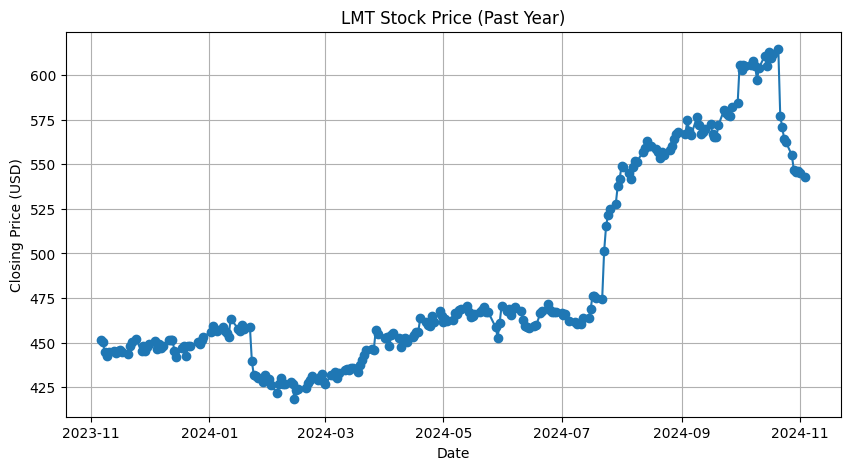

In [ ]:
# Function to plot stock data
def plot_stock_data(df, symbol):
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df['close'], marker='o', linestyle='-')
    plt.title(f'{symbol} Stock Price (Past Year)')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.grid(True)
    plt.show()

if stock_data is not None:
    print(stock_data)
    plot_stock_data(stock_data, stock_symbol)

<strong>Function to Fetch Stock News</strong>
<p>This function will use Finnhub to get the latest stock data for a given symbol.</p>


In [ ]:
# Function to fetch recent news articles from Finnhub
def get_news_articles_finnhub(symbol):
    try:
        end_date = datetime.now().strftime("%Y-%m-%d")
        start_date = (datetime.now() - timedelta(days=30)).strftime("%Y-%m-%d")
        url = f'https://finnhub.io/api/v1/company-news?symbol={symbol}&from={start_date}&to={end_date}&token={FINNHUB_API_KEY}'
        print(url)
        response = requests.get(url)
        articles = response.json()
        return articles
    except Exception as e:
        print(f"Exception occurred: {e}")
        return []

print(stock_symbol)
news_articles = get_news_articles_finnhub(stock_symbol)
if news_articles:
    print(f"\nRecent News Articles for {stock_symbol}:\n")
    for article in news_articles[:5]:  # Show only the first 5 articles
        print(f"Title: {article['headline']}")
        print(f"Date: {article['datetime']}")
        print(f"Source: {article['source']}")
        print(f"URL: {article['url']}\n")
else:
    print("No recent news articles found.")

LMT
https://finnhub.io/api/v1/company-news?symbol=LMT&from=2024-10-06&to=2024-11-05&token=cskg0t1r01qn1f3vkhj0cskg0t1r01qn1f3vkhjg

Recent News Articles for LMT:

Title: Ariel Investments Focus Fund Q3 2024 Commentary
Date: 1730802600
Source: SeekingAlpha
URL: https://finnhub.io/api/news?id=3131d81373ebbea046a0db4591dfd37499d383502c94c49bf48aa12492e18915

Title: Drones In Defense: Reshaping Modern Warfare And Its Economics
Date: 1730801400
Source: SeekingAlpha
URL: https://finnhub.io/api/news?id=2c44f94a95013ee2f3b486cedb98462d59a85e7262a440593bc7dbc185c59462

Title: Marshall Named First Lockheed Martin-Approved Center of Excellence for C-130 Hercules Center Wing Box Replacements
Date: 1730795925
Source: Finnhub
URL: https://finnhub.io/api/news?id=e9cd5ea381ec02b0d1c1897bf040fb8b4fb48ebb55878c3e1f6efab82dae74ee

Title: Lockheed Martin: Patriot missile proves its worth
Date: 1730787382
Source: Finnhub
URL: https://finnhub.io/api/news?id=bd74f378512b34fad9bb67dc350b8021ef499cad11ec0fc068

# Step 4: LLM Integration with OpenAI API

<div class="markdown-google-sans">

---

  </n>
  <p>In this step, we will:</p>
  <ol>
    <li>
      Setup the OpenAI API client.
    </li>
    <li>
      Fetch the summary of our stock price and news data to get sentiment analysis from ChatGPT
    </li>
  </ol>

</div>






In [ ]:
from openai import OpenAI

client = OpenAI(
  api_key='placeholder_key',
)



# Function to perform sentiment analysis and summarization using OpenAI API
def analyze_sentiment_with_openai(article_text):
    try:
        chat_completion = client.chat.completions.create(
            messages=[
                {
                    "role": "user",
                    "content": f"Analyze the sentiment of this article and summarize it: {article_text}",
                }
            ],
            model="gpt-3.5-turbo",
        )
        sentiment_summary = chat_completion.choices[0].message.content.replace(". ", ".\n")
        return sentiment_summary
    except Exception as e:
        print("Error with OpenAI API:", e)
        return None

sentiment_summary_list = []

for article in news_articles[:5]:  # Limit to first 5 articles for brevity
    # Convert timestamp to readable date format
    readable_date = datetime.utcfromtimestamp(article['datetime']).strftime('%Y-%m-%d %H:%M:%S')

    # Perform sentiment analysis and summarize with OpenAI
    sentiment_summary = analyze_sentiment_with_openai(article['summary'])
    formatted_summary = sentiment_summary.replace('. ', '.\n') if sentiment_summary else 'No summary available'


    # Define the parts separately
    title = f"Title: {article['headline']}\n"
    date = f"Date: {readable_date}\n"
    source = f"Source: {article['source']}\n"
    url = f"URL: {article['url']}\n"
    sentiment_summary_text = f"Sentiment Summary:\n {formatted_summary}\n"
    separator = '-' * 120 + '\n'

    # Combine all parts into one string
    article_summary = title + date + source + url + sentiment_summary_text + separator

    # Append the formatted string to the list
    sentiment_summary_list.append(article_summary)

# Combine all article summaries into a single string
news_summary = "\n".join(sentiment_summary_list)
print(news_summary)



Title: Ariel Investments Focus Fund Q3 2024 Commentary
Date: 2024-11-05 10:30:00
Source: SeekingAlpha
URL: https://finnhub.io/api/news?id=3131d81373ebbea046a0db4591dfd37499d383502c94c49bf48aa12492e18915
Sentiment Summary:
 The sentiment of this article is optimistic and positive.
It highlights the gains in major U.S.
indices in the third quarter and mentions the resilience of the economy.
Forecasters are also mentioned to be anticipating a soft landing, indicating confidence in the future performance of the economy.
Overall, the tone of the article is bullish on the current state and future prospects of the U.S.
economy.
------------------------------------------------------------------------------------------------------------------------

Title: Drones In Defense: Reshaping Modern Warfare And Its Economics
Date: 2024-11-05 10:10:00
Source: SeekingAlpha
URL: https://finnhub.io/api/news?id=2c44f94a95013ee2f3b486cedb98462d59a85e7262a440593bc7dbc185c59462
Sentiment Summary:
 The sentimen

<p>Now combining stock price data with the sentiment analysis:</p>

In [ ]:
def summarize_insights(stock_data, news_summary):
    try:
        chat_completion = client.chat.completions.create(
            messages=[
                {
                    "role": "user",
                    "content": f"Give a short summary in bullet points for {stock_symbol}, given {stock_data} and {news_summary}",
                }
            ],
            model="gpt-3.5-turbo",
        )
        summary_insight = chat_completion.choices[0].message.content.replace(". ", ".\n")
        return summary_insight
    except Exception as e:
        print("Error with OpenAI API:", e)
        return None

print(summarize_insights(stock_data, news_summary))

- LMT stock prices fluctuated between $443.10 and $553.40 over the past year
- The latest stock price was $543.10 with a high of $548.81 and a low of $540.41
- The volume of trading ranged from 792,756 to 1,771,562 shares
- The sentiment towards Lockheed Martin in recent articles has been positive and celebratory
- Lockheed Martin's achievements in defense technology and recognition in the industry are highlighted
- The company is mentioned as a strong contender in the American defense stock market, with positive outlooks for future growth and investment opportunities.
